In [266]:
%load_ext autoreload
%autoreload 2
from optimizers import Nesterov_Optimizers
from sklearn.datasets import fetch_california_housing, load_boston, load_diabetes

import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
n_samples=4000
n_features=70
X, y, coef = datasets.make_regression(n_samples = n_samples,#number of samples
                                      n_features = n_features,#number of features
                                      n_informative = 32,#number of useful features
                                      noise = 10,#bias and standard deviation of the guassian noise
                                      coef = True,#true coefficient used to generated the data
                                      random_state = 0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
y_train.shape

(2800,)

In [103]:
def get_coef_measures(X_train, y_train):
    Nesterov_accelerated = Nesterov_Optimizers()#gamma_u=1.9,gamma_d=2.5,lambda_=18)
    Nesterov_accelerated.fit(X_train, y_train, method="accelerated", verbose=True)
    acc_coef = Nesterov_accelerated.get_hist_coef()
    acc_measures = Nesterov_accelerated.get_measures()['combined']


    Nesterov_accelerated = Nesterov_Optimizers()#gamma_u=1.9,gamma_d=2.5,lambda_=18)
    Nesterov_accelerated.fit(X_train, y_train, method="dual_gradient", verbose=True)
    dual_coef = Nesterov_accelerated.get_hist_coef()
    dual_measures = Nesterov_accelerated.get_measures()['combined']


    Nesterov_accelerated = Nesterov_Optimizers()#gamma_u=1.9,gamma_d=2.5,lambda_=18)
    Nesterov_accelerated.fit(X_train, y_train, method="gradient", verbose=True)
    gradient_coef = Nesterov_accelerated.get_hist_coef()
    gradient_measures = Nesterov_accelerated.get_measures()['combined']
    
    return acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures

def get_mse():
    gradient_mse = [mean_squared_error(np.dot(X_train, coef), y_train) for coef in gradient_coef]
    dual_mse = [mean_squared_error(np.dot(X_train, coef), y_train) for coef in dual_coef]
    acc_mse = [mean_squared_error(np.dot(X_train, coef), y_train) for coef in acc_coef]
    
    return gradient_mse, dual_mse, acc_mse

In [62]:
# self.RMSE_acc.append(mean_squared_error(self.predict_plot(self.A, x), y_))
gradient_mse = [mean_squared_error(np.dot(X_train, coef), y_train) for coef in gradient_coef]
dual_mse = [mean_squared_error(np.dot(X_train, coef), y_train) for coef in dual_coef]
acc_mse = [mean_squared_error(np.dot(X_train, coef), y_train) for coef in acc_coef]

In [148]:
def plot_mse(gradient_mse, dual_mse, acc_mse, title = "Title", xlim=None, ylim=None):
    fig, ax = plt.subplots()
    ax.title(title)
    ax.plot(gradient_mse, c='g', ls='-', label='Gradient')
    ax.plot(dual_mse, c='r', ls='--', label='Dual Gradient')
    ax.plot(acc_mse, c='b', ls='-.', label='Accelerated')
    ax.legend()
    
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    
#plot_mse(gradient_mse, dual_mse, acc_mse, xlim=[0, 10], ylim=[0, 4000])

In [233]:
def plot_meassures(gradient_measure, dual_measure, acc_measure, title="Plot", xlim=None, ylim=None, mse=None):
    #fig, ax = plt.subplots(figsize=(15, 10))
    plt.rcParams['figure.figsize'] = (15,10)
    plt.rcParams['font.size'] = 20
    plt.rcParams['lines.linewidth'] = 4
    plt.title(title)
    plt.plot(gradient_measure, c='g', ls='-', label='Gradient')
    plt.plot(dual_measure, c='r', ls='--', label='Dual Gradient')
    plt.plot(acc_measure, c='b', ls='-.', label='Accelerated')
    plt.legend()
    plt.ticklabel_format(useOffset=False, style='plain')
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    
    plt.xlabel("Iteration no.")
    if mse:
        plt.ylabel("MSE")
    else:
        plt.ylabel("Objective Function")
        
    plt.savefig(f"fig/{title}.png")    
    plt.show()
#plot_meassures(gradient_measures, dual_measures, acc_measures, xlim=[0, 20], ylim=[0, 30000])

### Problem 1

In [257]:
n_samples=4000
n_features=1000
n_informative=100
X, y, coef = datasets.make_regression(n_samples = n_samples,#number of samples
                                      n_features = n_features,#number of features
                                      n_informative = n_informative,#number of useful features
                                      noise = 10,#bias and standard deviation of the guassian noise
                                      coef = True #true coefficient used to generated the data
                                     )
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

accelerated  early stopping at  63
dual_gradient  early stopping at  24
gradient  early stopping at  25


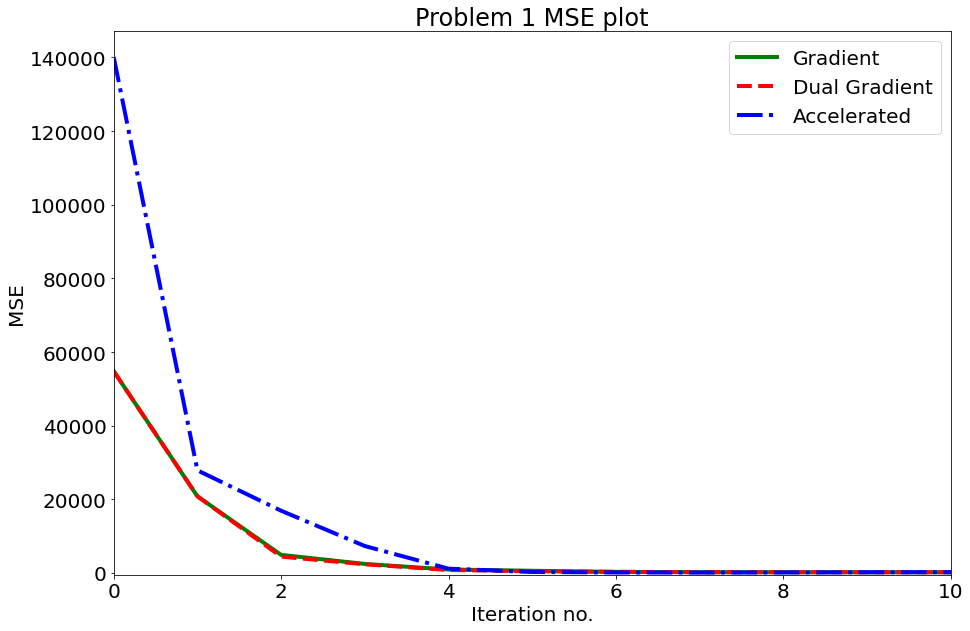

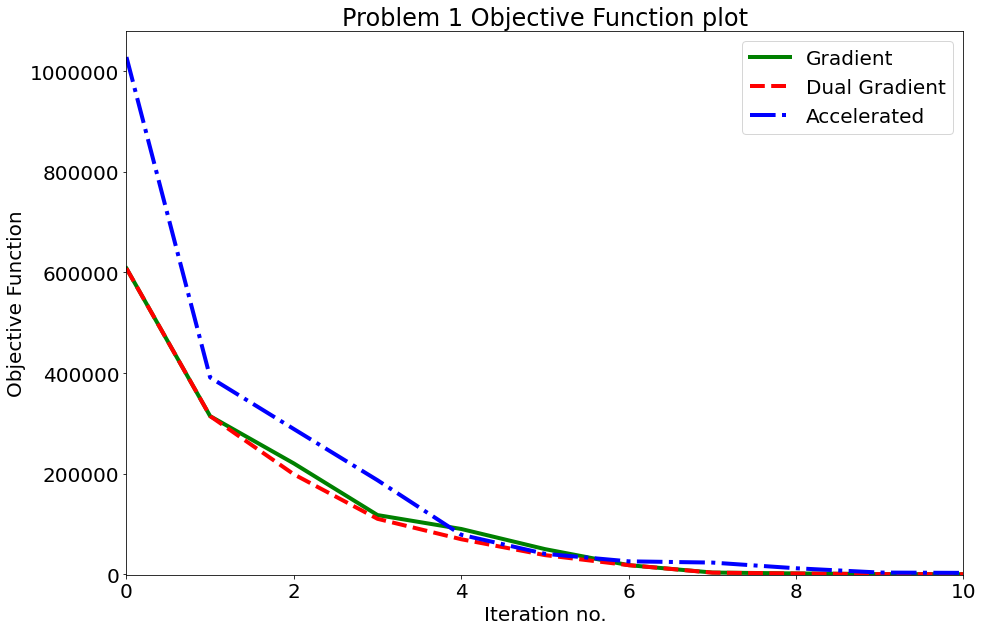

In [258]:
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X_train, y_train)
gradient_mse, dual_mse, acc_mse = get_mse()
plot_meassures(gradient_mse, dual_mse, acc_mse, title="Problem 1 MSE plot", xlim=[0, 10], ylim=[-500, None], mse=1)
plot_meassures(gradient_measures, dual_measures, acc_measures, title="Problem 1 Objective Function plot", xlim=[0, 10], ylim=[-1000, None])

### Problem 2

In [259]:
n_samples=5000
n_features=500
n_informative=100
X, y, coef = datasets.make_regression(n_samples = n_samples,#number of samples
                                      n_features = n_features,#number of features
                                      n_informative = n_informative,#number of useful features
                                      noise = 10,#bias and standard deviation of the guassian noise
                                      coef = True #true coefficient used to generated the data
                                      )
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

accelerated  early stopping at  53
dual_gradient  early stopping at  33
gradient  early stopping at  21


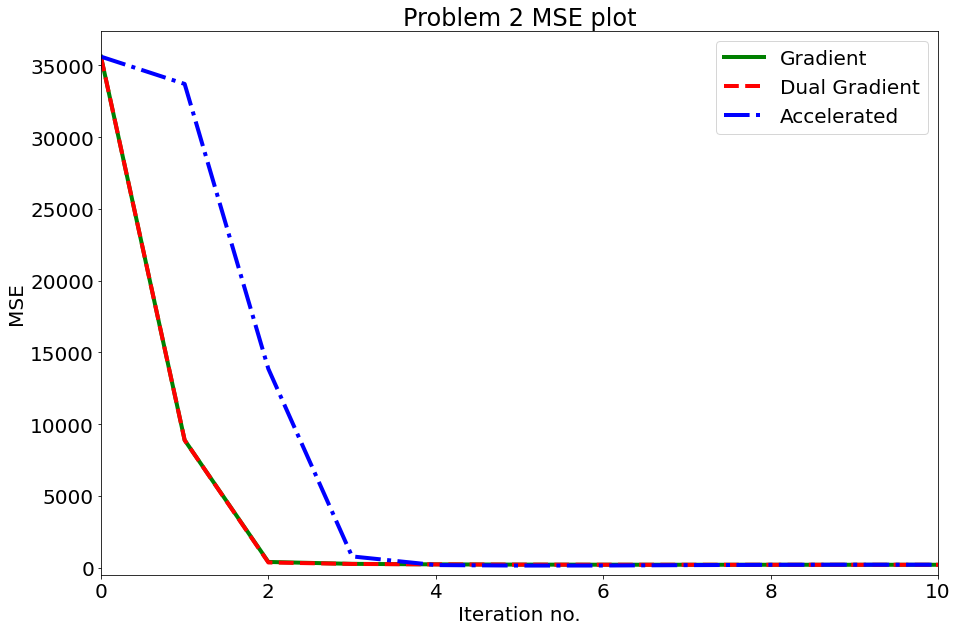

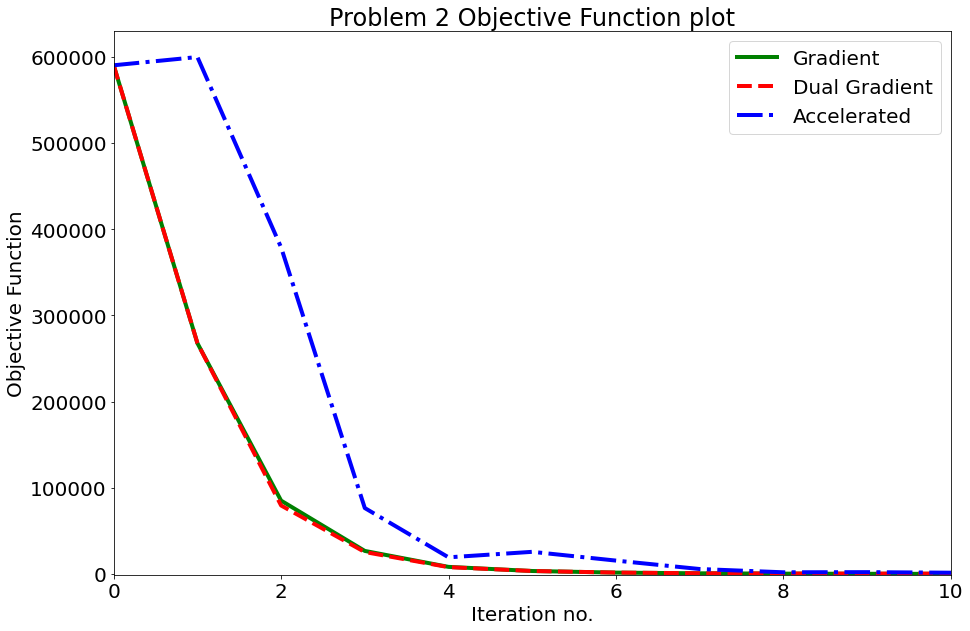

In [260]:
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X_train, y_train)
gradient_mse, dual_mse, acc_mse = get_mse()
plot_meassures(gradient_mse, dual_mse, acc_mse, title="Problem 2 MSE plot", xlim=[0, 10], ylim=[-500, None], mse=1)
plot_meassures(gradient_measures, dual_measures, acc_measures, title="Problem 2 Objective Function plot", xlim=[0, 10], ylim=[-1000, None])

### Problem 3

In [237]:
n_samples=500
n_features=50
n_informative=25
X, y, coef = datasets.make_regression(n_samples = n_samples,#number of samples
                                      n_features = n_features,#number of features
                                      n_informative = n_informative,#number of useful features
                                      noise = 10,#bias and standard deviation of the guassian noise
                                      coef = True #true coefficient used to generated the data
                                      )
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

accelerated  early stopping at  53
dual_gradient  early stopping at  33
gradient  early stopping at  21


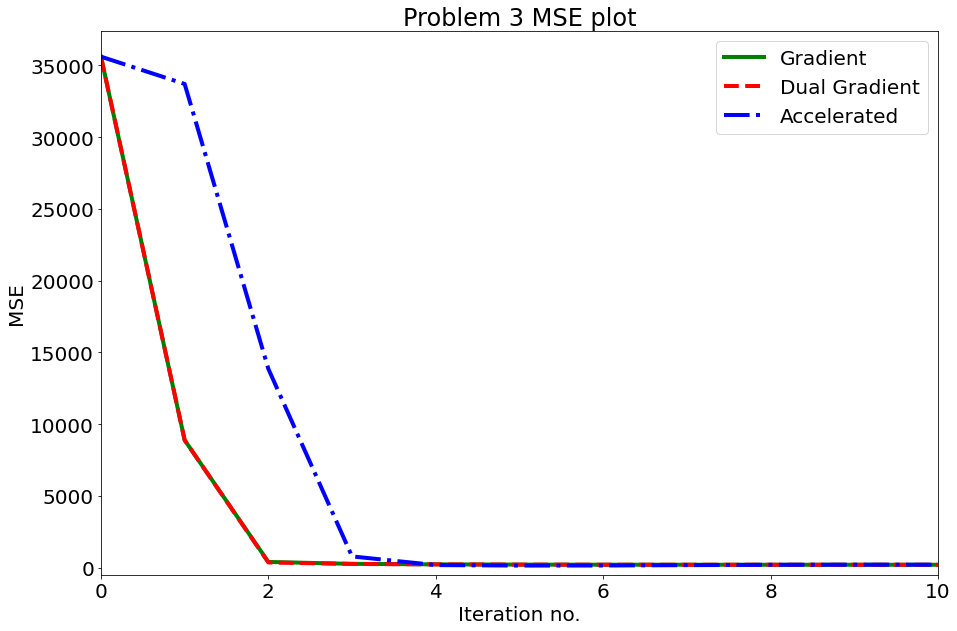

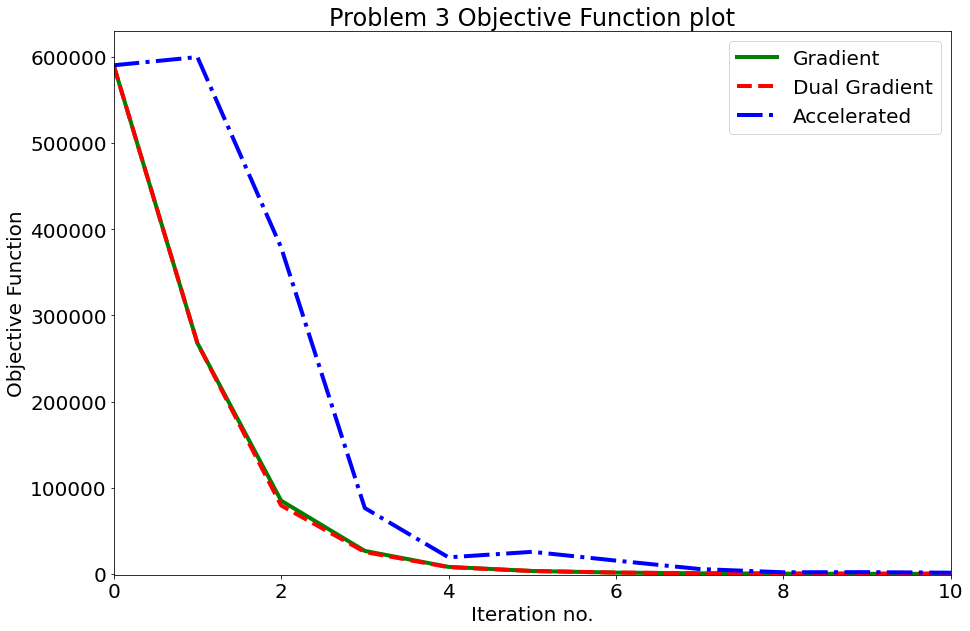

In [261]:
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X_train, y_train)
gradient_mse, dual_mse, acc_mse = get_mse()
plot_meassures(gradient_mse, dual_mse, acc_mse, title="Problem 3 MSE plot", xlim=[0, 10], ylim=[-500, None], mse=1)
plot_meassures(gradient_measures, dual_measures, acc_measures, title="Problem 3 Objective Function plot", xlim=[0, 10], ylim=[-1000, None])

### Problem 4

In [ ]:
n_samples=1000
n_features=100
n_informative=50
X, y, coef = datasets.make_regression(n_samples = n_samples,#number of samples
                                      n_features = n_features,#number of features
                                      n_informative = n_informative,#number of useful features
                                      noise = 10,#bias and standard deviation of the guassian noise
                                      coef = True #true coefficient used to generated the data
                                      )
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X_train, y_train)
gradient_mse, dual_mse, acc_mse = get_mse()
plot_meassures(gradient_mse, dual_mse, acc_mse, title="Problem 4: MSE plot", xlim=[0, 10], ylim=[0, None], mse=1)
plot_meassures(gradient_measures, dual_measures, acc_measures, title="Problem 4: Objective Function plot", xlim=[0, 10], ylim=[0, None])

### Problem 5

In [ ]:
n_samples=10000
n_features=1000
n_informative=50
X, y, coef = datasets.make_regression(n_samples = n_samples,#number of samples
                                      n_features = n_features,#number of features
                                      n_informative = n_informative,#number of useful features
                                      noise = 10,#bias and standard deviation of the guassian noise
                                      coef = True #true coefficient used to generated the data
                                      )
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X_train, y_train)
gradient_mse, dual_mse, acc_mse = get_mse()
plot_meassures(gradient_mse, dual_mse, acc_mse, title="Problem 5: MSE plot", xlim=[0, 10], ylim=[0, None], mse=1)
plot_meassures(gradient_measures, dual_measures, acc_measures, title="Problem 5: Objective Function plot", xlim=[0, 10], ylim=[0, None])

## Problem 6

In [254]:
X,y= load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

C:\Users\User\miniconda3\envs\4wheel\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housin

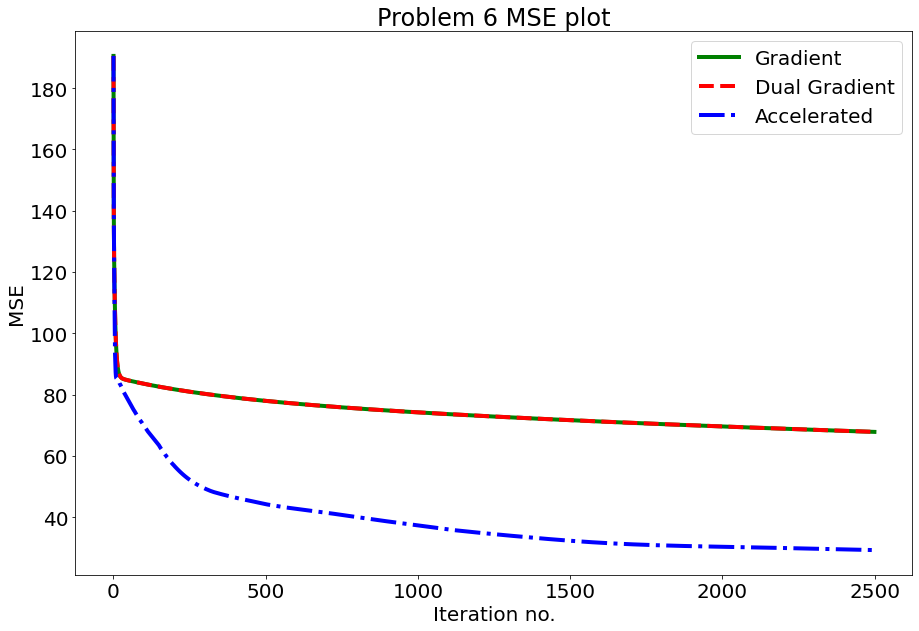

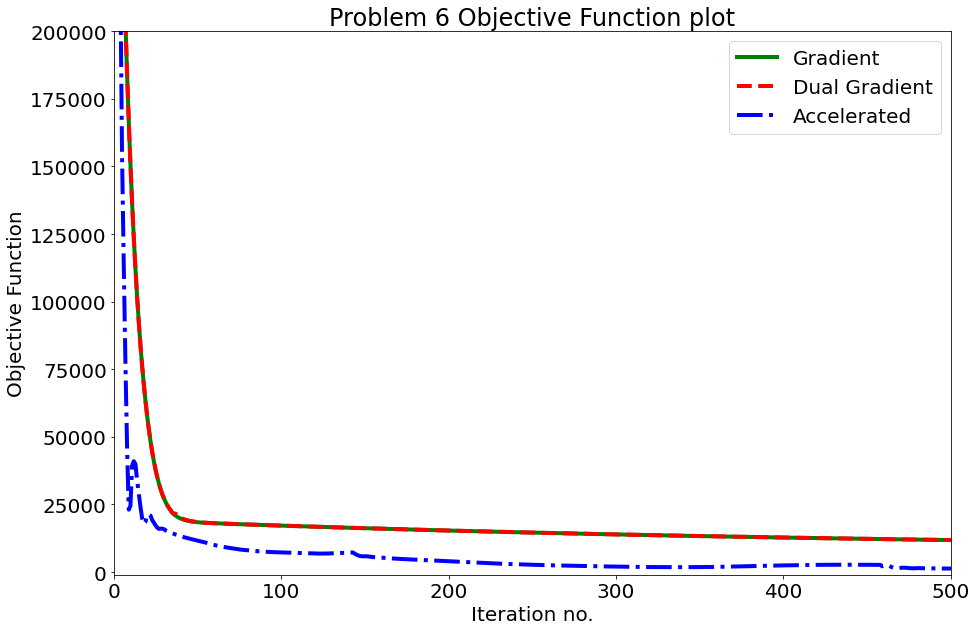

In [255]:
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X_train, y_train)
gradient_mse, dual_mse, acc_mse = get_mse()
plot_meassures(gradient_mse, dual_mse, acc_mse, title="Problem 6 MSE plot", mse=1)
plot_meassures(gradient_measures, dual_measures, acc_measures, title="Problem 6 Objective Function plot",  xlim=[0, 500], ylim=[-1000, 200000])

## Problem 7

In [263]:
X,y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

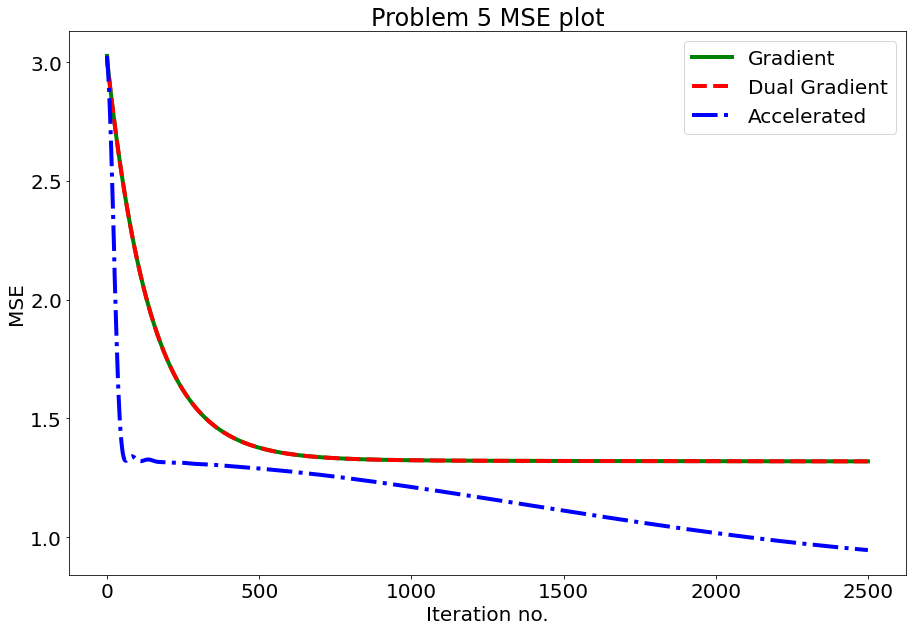

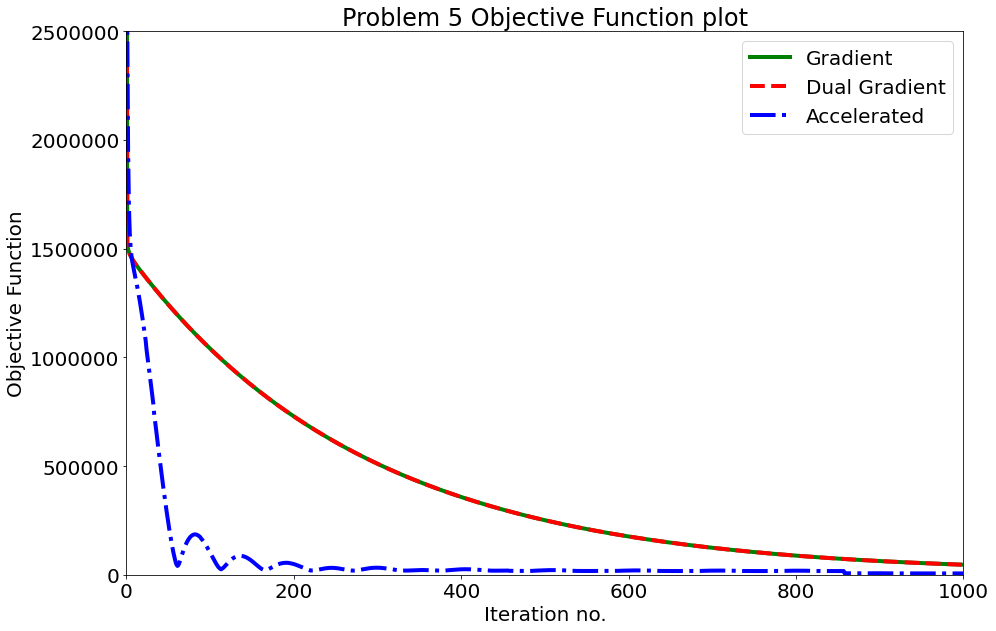

In [264]:
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X_train, y_train)
gradient_mse, dual_mse, acc_mse = get_mse()
plot_meassures(gradient_mse, dual_mse, acc_mse, title="Problem 5 MSE plot", mse=1)
plot_meassures(gradient_measures, dual_measures, acc_measures, title="Problem 5 Objective Function plot", xlim=[0, 1000], ylim=[0, 2500000])

In [267]:
X,y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X_train, y_train)
gradient_mse, dual_mse, acc_mse = get_mse()


accelerated  early stopping at  57
dual_gradient  early stopping at  56
gradient  early stopping at  56


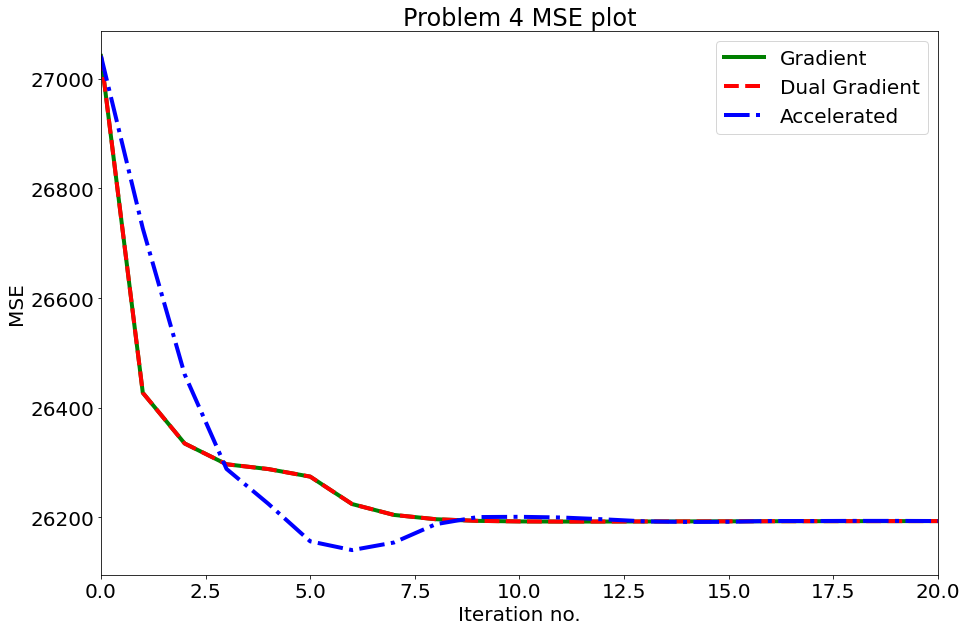

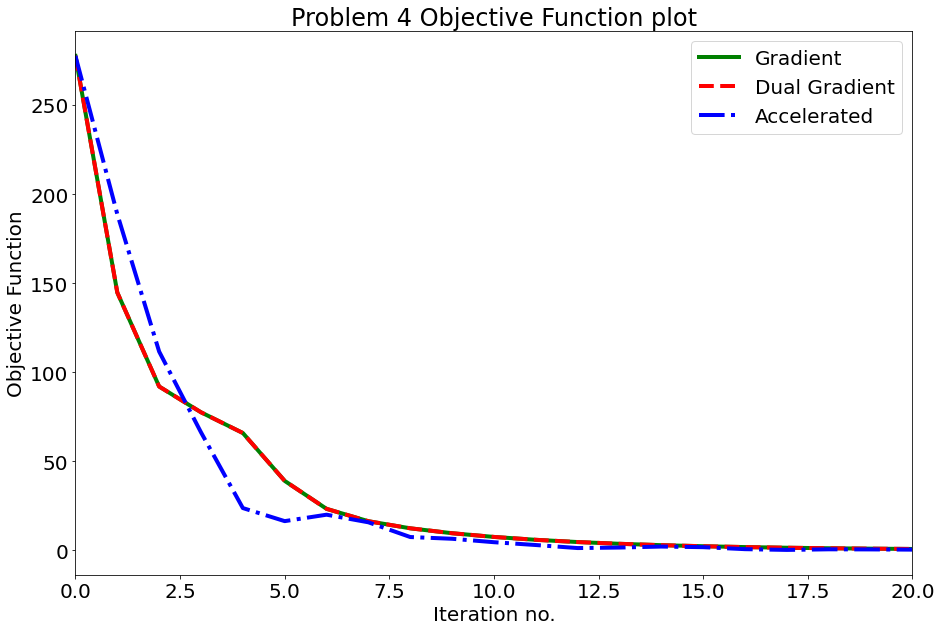

In [270]:
plot_meassures(gradient_mse, dual_mse, acc_mse, title="Problem 4 MSE plot", xlim=[0, 20], mse=1)
plot_meassures(gradient_measures, dual_measures, acc_measures, title="Problem 4 Objective Function plot", xlim=[0, 20])